# Import Modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

# Load the Dataset

In [2]:

data=pd.read_csv(r"C:\Users\sachd\Downloads\archive (4)\Mall_Customers.csv")
data.head()

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\sachd\\Downloads\\archive (4)\\Mall_Customers.csv'

In [6]:
#Statistical info
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
# datatype info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


# Exploratory Data Analysis

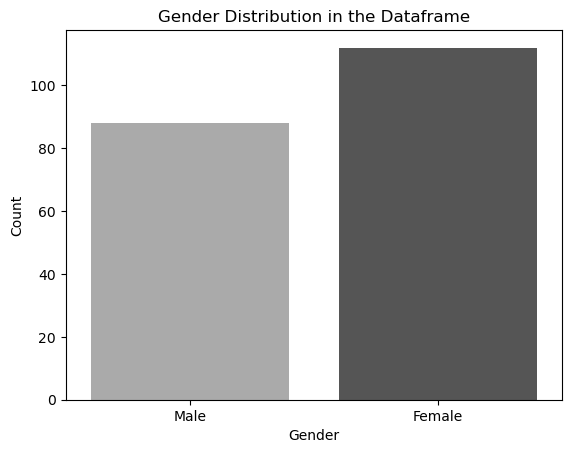

In [9]:
#Create the count plot
sns.countplot(x='Gender', data=data, palette='binary')

# Add labels and title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution in the Dataframe')

# Show the plot
plt.show()

<Axes: xlabel='Age', ylabel='Density'>

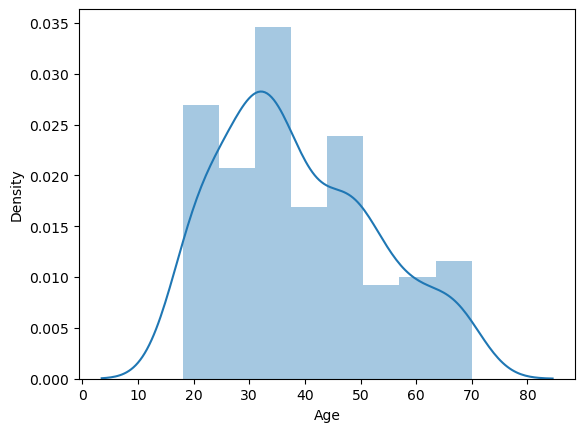

In [10]:
sns.distplot(data['Age'])

<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

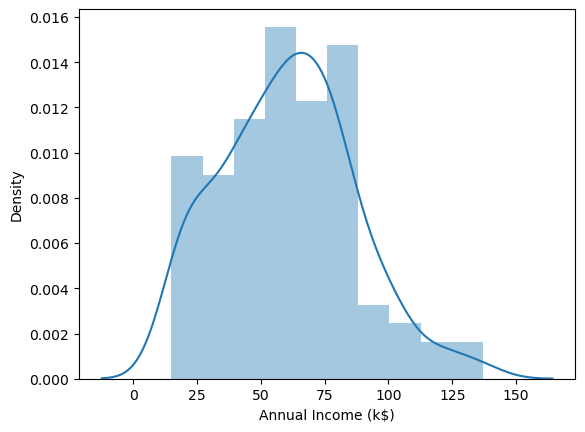

In [11]:
sns.distplot(data['Annual Income (k$)'])

<Axes: xlabel='Spending Score (1-100)', ylabel='Density'>

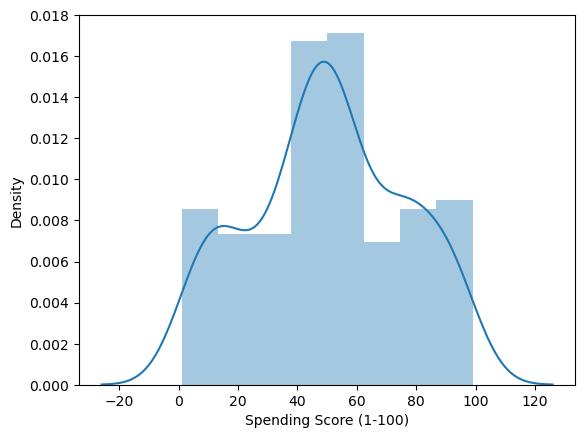

In [12]:
sns.distplot(data['Spending Score (1-100)'])

# correlation Matrix

<Axes: >

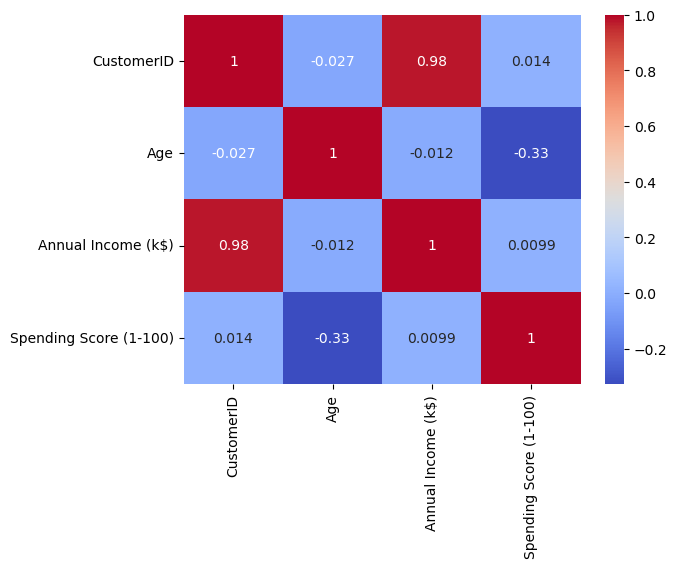

In [25]:
corr=data.corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')

# Clustering

In [26]:
df=data[['Annual Income (k$)','Spending Score (1-100)']]
df.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

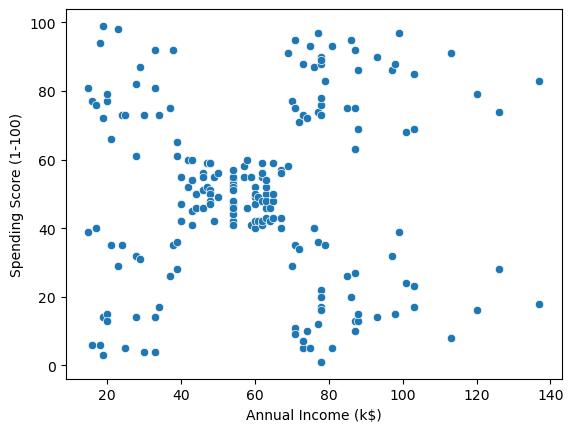

In [27]:
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df, palette='Set1')

In [28]:
from sklearn.cluster import KMeans
errors=[]
for i in range(1,11):
    Kmeans=KMeans(n_clusters=i)
    Kmeans.fit(df)
    errors.append(Kmeans.inertia_)

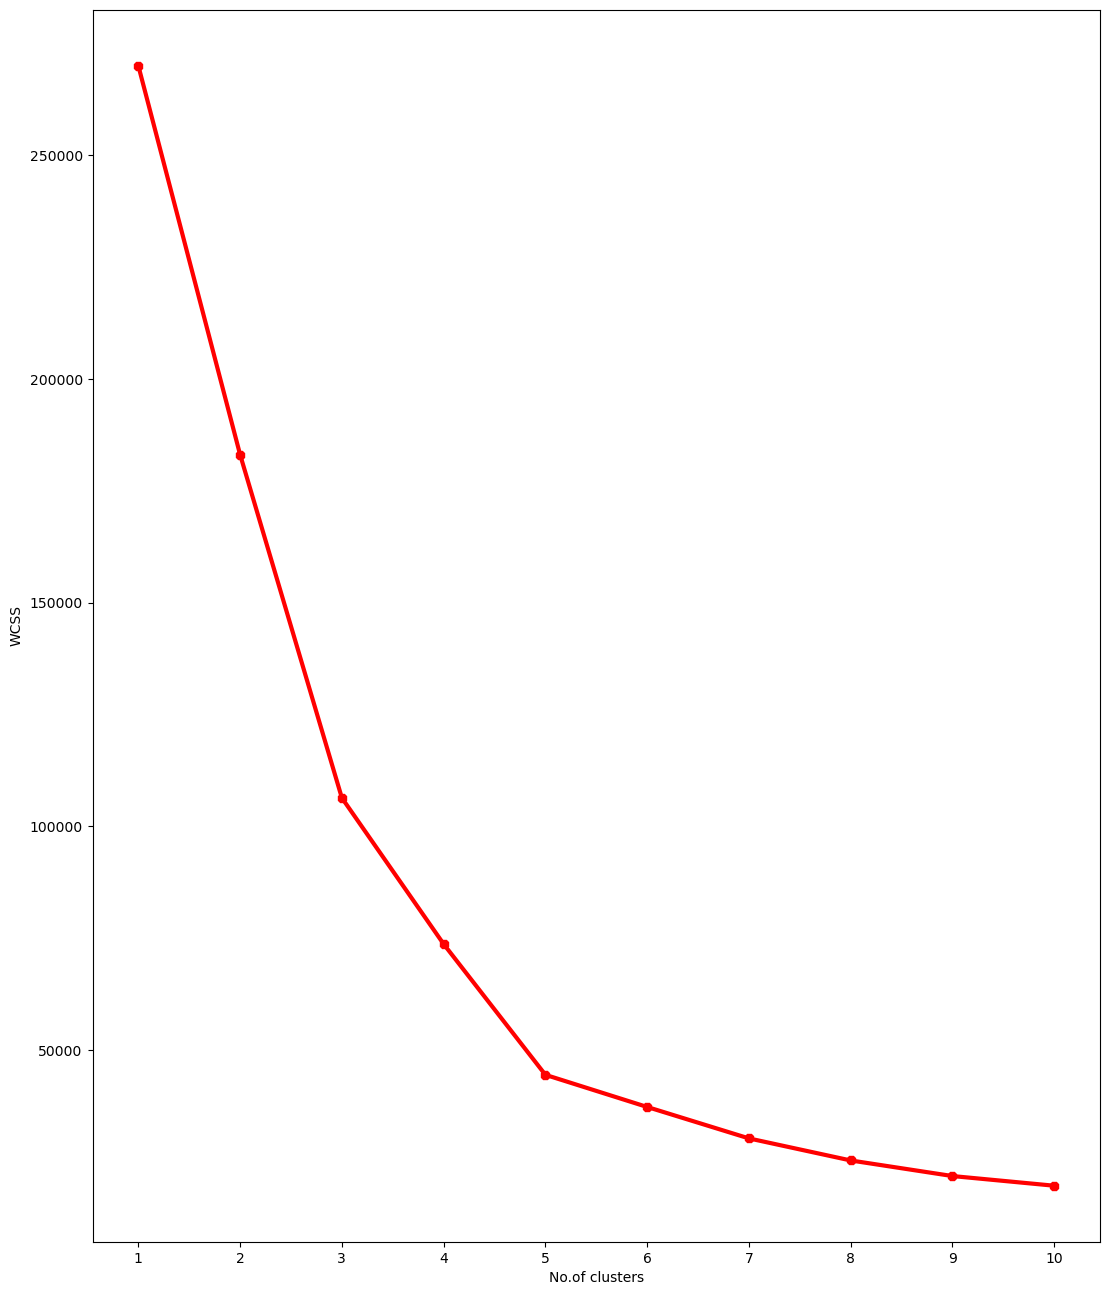

In [29]:
#plot results for elbow method
plt.figure(figsize=(13,16))
plt.plot(range(1,11),errors)
plt.plot(range(1,11),errors,linewidth=3,color='red',marker='8')
plt.xlabel('No.of clusters')
plt.ylabel('WCSS')
plt.xticks(np.arange(1,11,1))
plt.show()

In [30]:
km=KMeans(n_clusters=5)
km.fit(df)
y=km.predict(df)
df['Label']=y
df.head()

,Annual Income (k$),Spending Score (1-100),Label
0,15,39,0
1,15,81,2
2,16,6,0
3,16,77,2
4,17,40,0


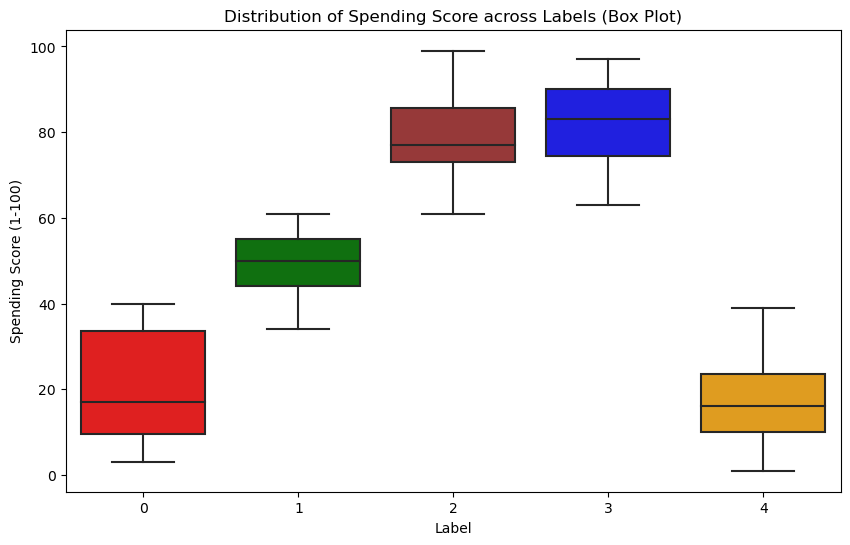

In [39]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Label', y='Spending Score (1-100)', data=df, palette=['red','green','brown','blue','orange'])
plt.title('Distribution of Spending Score across Labels (Box Plot)')
plt.show()


In [32]:
df1=data[['Annual Income (k$)','Spending Score (1-100)','Age']]
df1.head()

,Annual Income (k$),Spending Score (1-100),Age
0,15,39,19
1,15,81,21
2,16,6,20
3,16,77,23
4,17,40,31


In [33]:
errors=[]
for i in range(1,11):
    Kmeans=KMeans(n_clusters=i)
    Kmeans.fit(df1)
    errors.append(Kmeans.inertia_)

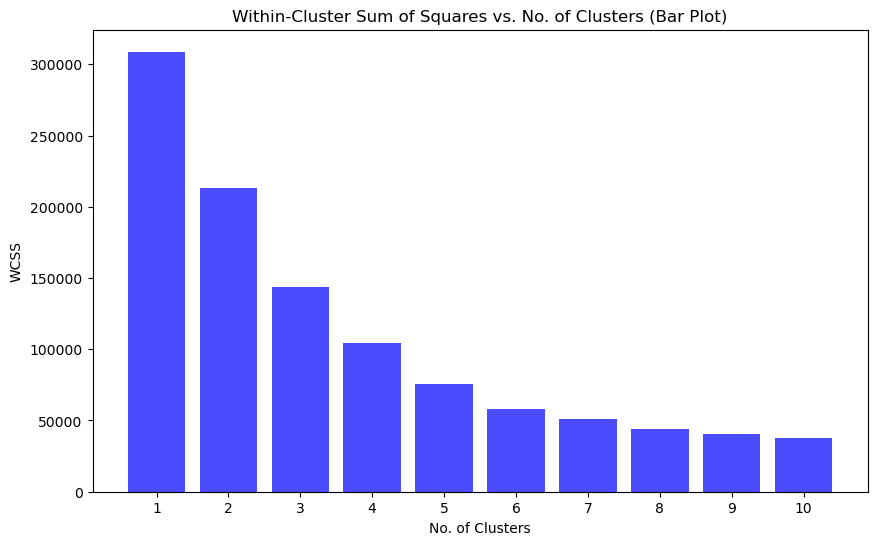

In [38]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))
plt.bar(range(1, 11), errors, color='blue', alpha=0.7)
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.title('Within-Cluster Sum of Squares vs. No. of Clusters (Bar Plot)')
plt.xticks(np.arange(1, 11, 1))
plt.show()


In [37]:
km=KMeans(n_clusters=5)
km.fit(df1)
y=km.predict(df1)
df1['Label']=y
df1.head()

,Annual Income (k$),Spending Score (1-100),Age,Label
0,15,39,19,3
1,15,81,21,4
2,16,6,20,3
3,16,77,23,4
4,17,40,31,3


In [36]:
#3d scatter plot
ax.scatter(df2['Age'][df2['Label']==0], df2['Annual Income (k$)'][df2['Label']==0], df2['Spending Score (1-100)'][df2['Label']==0], c='red', s=50)
ax.scatter(df2['Age'][df2['Label']==1], df2['Annual Income (k$)'][df2['Label']==1], df2['Spending Score (1-100)'][df2['LaZbel']==1], c='blue', s=50)
ax.scatter(df2['Age'][df2['Label']==2], df2['Annual Income (k$)'][df2['Label']==2], df2['Spending Score (1-100)'][df2['Label']==2], c='green', s=50)
ax.scatter(df2['Age'][df2['Label']==3], df2['Annual Income (k$)'][df2['Label']==3], df2['Spending Score (1-100)'][df2['Label']==3], c='yellow', s=50)
ax.scatter(df2['Age'][df2['Label']==4], df2['Annual Income (k$)'][df2['Label']==4], df2['Spending Score (1-100)'][df2['Label']==4], c='purple', s=50)
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Spending Score')
plt.show()


NameError: name 'ax' is not defined